## CA6005 Mechanics of Search: Designing anf Implementing an Image Search Engine
### Assignement 2

## Khizer Ahmed Biyabani

## Loading the necessary libraries

In [1]:
import requests as rq
from bs4 import BeautifulSoup
import os
from requests_html import HTMLSession
s = HTMLSession()

import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from itertools import chain
from skimage import io
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import urllib

import anvil.server
import anvil.media

In [2]:
def create_dir(path):
    """ Creating different folders """
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print("Error")

In [3]:
def create_file(path):
    """ Create a file """
    try:
        if not os.path.exists(path):
            f = open(path, "w")
            f.write("Category,Source,Name,Alt\n")
            f.close()
    except OSError:
        print("Error")

In [4]:
def save_image(search_term,page_num=1):
    image_data = pd.DataFrame()
    ## URL and headers
    url = "https://www.freepik.com/search?dates=any&format=search&page="+str(page_num)+"&query="+str(search_term)+"&selection=1&sort=popular&type=photo"
    header = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'}

    ## making a GET request to the website and getting the information in response.
    result = rq.get(url, headers=header)

    if result.status_code == 200:
        soup = BeautifulSoup(result.content, "html.parser")
    else:
        print("Error")
        exit()

    ## Paths and file for saving the images and data.
    dir_path = f"Downloads/"
    file_path = f"photos.csv"

    create_dir(dir_path)
    create_file(file_path)

    f = open(file_path, "a")
    for tag in soup.find_all("a", class_="showcase__link"):
        if tag.img:
            try:
                src = tag.img["data-src"]
                alt = tag.img["alt"]
            except Exception as e:
                alt = None

            try:
                if alt:
                    image = io.imread(src)
                    name = src.split("/")[-1].split("?")[0]
#                     name = search_term
                    data = f"{search_term},{src},{name},{alt}\n"
                    f.write(data)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    cv2.imwrite(dir_path + name, image)
                    print(name, ": ", alt)
            except Exception as e:
                pass

In [6]:
if __name__ == "__main__":
    
    fruits = ['apple','banana','watermelon','grapes','guava','pineapple','orange','raspberry','mango','kiwi','melon','avocado']
    for term in fruits:
        save_image(term, page_num=1)
        save_image(term, page_num=2)
        

red-apple-with-green-leaf-white-background_1232-3290.jpg :  Red apple with green leaf on white background .
two-red-apples-isolated-white_114579-73124.jpg :  Two red apples isolated on white.
green-apple-isolated-white_114579-31259.jpg :  Green apple isolated on white.
green-apple-with-leaves_1101-453.jpg :  Green apple with leaves
green-apples-ceramic-saucer-towel_114579-11576.jpg :  Green apples in a ceramic saucer on the towel
red-apple-basket_74190-6134.jpg :  Red apple in basket
apples-table_144627-6739.jpg :  Apples on the table
apples-table_144627-6741.jpg :  Apples on the table
close-up-fresh-apple_144627-14640.jpg :  Close up of fresh apple
green-fresh-apples-white-background_114579-55616.jpg :  Green fresh apples on white background.
apples-red-fresh-mellow-juicy-perfect-whole-white-desk_179666-271.jpg :  Apples red fresh mellow juicy perfect whole on white desk
three-fresh-whole-sliced-apples-white-background_114579-55617.jpg :  Three fresh whole and sliced apples on white b

two-red-apples-white_114579-29467.jpg :  Two red apples on white.
fresh-red-apple-white-background_114579-14825.jpg :  Fresh red apple on white background.
bunch-green-apples-stone-background-high-quality-photo_114579-68914.jpg :  Bunch of green apples on stone background. high quality photo
green-apple-mellow-juicy-fresh-isolated-white-floor_179666-619.jpg :  Green apple mellow juicy fresh isolated on white floor
pile-red-fresh-apples_342744-599.jpg :  Pile of red fresh apples
top-view-delicious-apple-pie_23-2148663978.jpg :  Top view delicious apple pie
harvesting-apple-fruit-green-orchard_342744-315.jpg :  Harvesting apple fruit in green orchard
top-view-delicious-apple-pie_23-2148719054.jpg :  Top view delicious apple pie
red-green-fresh-apple-placed-around-wooden-plate_114579-52348.jpg :  Red and green fresh apple placed around wooden plate.
hand-apple_144627-2090.jpg :  Hand and an apple
green-apple-red_58702-2029.jpg :  Green apple on red
vertical-high-angle-shot-bowl-porridge-w

variety-fresh-fruits-marble_114579-51430.jpg :  A variety of fresh fruits , on the marble.
bunch-fresh-bananas-isolated-white-background_181624-37438.jpg :  Bunch of fresh bananas isolated on a white background
fresh-strawberry-banana-smoothie-jar-isolated-white-background_123827-20724.jpg :  Fresh strawberry and banana smoothie in jar isolated on white background
top-view-cute-bananas-arrangement_23-2148891824.jpg :  Top view cute bananas arrangement
fresh-bananas-wooden-table_1232-3306.jpg :  Fresh bananas on wooden table .
peeled-sliced-banana-wooden-board_114579-48603.jpg :  Peeled and sliced banana on wooden board
sliced-dried-banana_1368-9442.jpg :  Sliced dried banana
person-is-going-step-banana-peel_1101-715.jpg :  A person is going to step on a banana peel
raw-yellow-banana-slices-wooden-bowl_74190-2180.jpg :  Raw yellow banana slices in wooden bowl
single-ripe-delicious-yellow-banana-isolated-studio-background-bright-color-prevails-tropical-fruit-your-tasty-snack-appetizing-e

scattered-watermelon-pieces-blue-background-top-view_176474-5650.jpg :  Scattered watermelon pieces on blue background, top view.
fresh-watermelon_1339-786.jpg :  Fresh watermelon
fresh-sliced-watermelon-wooden-background_1387-293.jpg :  Fresh sliced watermelon on wooden background
summer-fruits-with-copy-space-summer-background_53876-120620.jpg :  Summer fruits with copy space. summer background
ripe-tasty-raw-striped-fruit_1203-5527.jpg :  Ripe tasty raw striped fruit
green-whole-ripe-watermelon_23-2148102560.jpg :  Green whole ripe watermelon
front-view-sliced-fresh-watermelon-sweet-mellow-white-desk_140725-24877.jpg :  A front view sliced fresh watermelon sweet and mellow on white desk
watermelon-with-knife-white-table_53876-96800.jpg :  Watermelon with knife on white table
joyful-girl-with-long-light-brown-hair-biting-watermelon-close-up-portrait-excited-female-model-big-dark-sunglasses-enjoying-favorite-food-with-smile_291049-1792.jpg :  Joyful girl with long light-brown hair bit

wavy-long-haired-trendy-girl-with-bright-lipstick-unusual-accessories-green-summer-clothes-posing-with-watermelon_197531-28037.jpg :  Wavy long haired trendy girl with bright lipstick and unusual accessories in green summer clothes posing with watermelon
lovely-curly-haired-girl-with-red-lips-stylish-earrings-printed-stylish-sundress-cool-sunglasses-holding-watermelon_197531-28041.jpg :  Lovely curly haired girl with red lips and stylish earrings in printed stylish sundress and cool sunglasses holding watermelon
cheerful-curly-woman-good-mood-stylish-green-clothes-red-sunglasses-looking-into-camera-eating-watermelon_197531-28045.jpg :  Cheerful curly woman in good mood in stylish green clothes and red sunglasses looking into camera and eating watermelon
beautiful-cool-girl-with-curly-dark-hair-trendy-bright-summer-dress-red-sunglasses-posing-with-watermelon-orange-backdrop_197531-28049.jpg :  Beautiful cool girl with curly dark hair in trendy bright summer dress and red sunglasses posi

grapes-growing-vine-yard-fresh-sweet-harvest-autumns_1268-15702.jpg :  Grapes growing in the vine yard. fresh sweet harvest in autumns
top-view-white-grape-berries-bowl-white-background-with-copy-space_141793-25238.jpg :  Top view of white grape berries in bowl and on white background with copy space
red-grape-isolated-white_1232-1955.jpg :  Red grape isolated on white
fresh-green-grapes-isolated-white_167946-7.jpg :  Fresh green grapes isolated on white
red-grape-berries-isolated-blue-table_114579-76454.jpg :  Red grape berries isolated on blue table.
side-close-up-view-white-grapes-appetizing-bunch-white-grapes-wooden-box-grey-table-spruce-branches_140725-110510.jpg :  Side close-up view white grapes appetizing bunch of white grapes in wooden box on grey table next to spruce branches
yarpaq-dolmasi-yaprak-sarmasi-green-grape-leaves-stuffed-with-meat-takeaway_114579-974.jpg :  Yarpaq dolmasi, yaprak sarmasi, green grape leaves stuffed with meat takeaway
glass-wine-with-lavender-bush_1

top-view-fresh-feykhoas-basket-grey-surface_140725-63409.jpg :  Top view fresh feykhoas in basket on grey surface
close-up-fresh-guava-ready-be-served_23-2148482324.jpg :  Close-up fresh guava ready to be served
close-up-delicious-guava-ready-be-served_23-2148482326.jpg :  Close-up delicious guava ready to be served
close-up-delicious-guavas-ready-be-served_23-2148482323.jpg :  Close-up delicious guavas ready to be served
close-up-delicious-guava-fruit-ready-be-served_23-2148482325.jpg :  Close-up delicious guava fruit ready to be served
fresh-organic-feijoas-light_114579-4755.jpg :  Fresh organic feijoas on light
various-fruits-eating-health-care-healthy-concept_1150-4828.jpg :  Various fruits, eating health care and healthy concept
various-fruits-eating-health-care-healthy-concept_1150-4830.jpg :  Various fruits, eating health care and healthy concept
various-fruits-eating-health-care-healthy-concept_1150-4831.jpg :  Various fruits, eating health care and healthy concept
various-frui

top-close-view-eight-limes-bowl-eight-limes-bowl-center-grey-table_140725-117364.jpg :  Top close view eight limes in a bowl eight limes in a bowl in the center of grey table
close-up-guava-fruits-plate_23-2148352309.jpg :  Close up guava fruits on plate
side-close-up-view-green-apples-appetizing-eight-green-apples-wooden-basket_140725-122921.jpg :  Side close-up view green apples the appetizing eight green apples in the wooden basket
various-fruits-eating-health-care-healthy-concept_1150-4829.jpg :  Various fruits, eating health care and healthy concept
fresh-organic-feijoas-light_114579-4753.jpg :  Fresh organic feijoas on light
half-shot-fresh-green-mandarins-with-leaves-wooden-cutting-board-gray-background-stock-photo_140725-140208.jpg :  Half shot of fresh green mandarins with leaves on wooden cutting board on gray background stock photo
various-fruits-eating-health-care-healthy-concept_1150-4826.jpg :  Various fruits, eating health care and healthy concept
top-view-tasty-green-ap

pineapple-juice-white-wooden-surface_1150-42307.jpg :  Pineapple juice on white wooden surface
pineapple-pizza-chicken-onion-cheese-dough-top-view_141793-15504.jpg :  Pineapple pizza chicken onion cheese dough top view
hawaiian-pizza_74190-6941.jpg :  Hawaiian pizza
pineapple-juice-dark-wooden-surface_1150-42301.jpg :  Pineapple juice on dark wooden surface
pineapple-juice-white-wooden-surface_1150-41877.jpg :  Pineapple juice on white wooden surface
top-view-pineapple-pizza-stand-with-knives-rolling-pin-flour-black-table_141793-13170.jpg :  Top view pineapple pizza on stand with knives rolling pin and flour on black table
top-view-dried-pineapple-slices-isolated-white-background_141793-9055.jpg :  Top view of dried pineapple slices isolated on white background
beautiful-pineapple-plant-south-africa-during-daytime_181624-14231.jpg :  Beautiful pineapple plant in south africa during daytime
asian-farmer-have-mother-daughter-see-growth-pineapple-farm-save-data-farmer-checking-list-her-cl

delicious-orange-with-white-background_1112-813.jpg :  Delicious orange with white background
yellow-watercolor-paper_95678-446.jpg :  Yellow watercolor paper
orange-from-garden_1150-9680.jpg :  Orange from the garden.
eating-backgrounds-white-orange-object_1172-283.jpg :  Eating backgrounds white orange object
cut-whole-orange-fruits-with-green-leaves_74855-5380.jpg :  Cut and whole orange fruits with green leaves
wooden-board-full-juicy-slices-orange-fruit-stone-table_114579-40320.jpg :  A wooden board full of juicy slices of orange fruit on stone table .
wooden-board-full-juicy-slices-orange-fruit-stone-table_114579-40386.jpg :  A wooden board full of juicy slices of orange fruit on stone table .
set-fruits-seeds-leaves_23-2148145087.jpg :  Set of fruits, seeds and leaves
slice-ripe-orange-citrus-fruit-isolated-white_146671-19261.jpg :  Slice ripe orange citrus fruit isolated on white.
sliced-whole-oranges_144627-3972.jpg :  Sliced and whole oranges
top-view-fresh-mandarines-wicker-

delicious-orange-citrus-fruit-pieces-light-orange-background_53876-98385.jpg :  Delicious orange citrus fruit pieces on a light orange background
wooden-board-full-juicy-slices-orange-fruit-stone-table_114579-40388.jpg :  A wooden board full of juicy slices of orange fruit on stone table .
front-view-fresh-tangerines-with-red-pomegranates-light-background-photo-juice-color-vitamine-taste-fruit-exotic-tree_140725-98223.jpg :  Front view fresh tangerines with red pomegranates on light background photo juice color vitamine taste fruit exotic tree
sliced-whole-oranges_144627-3983.jpg :  Sliced and whole oranges
bright-whole-oranges-with-green-leaves-cut-fruits_74855-5375.jpg :  Bright whole oranges with green leaves and cut fruits
wooden-board-full-juicy-slices-orange-fruit-stone-table_114579-40316.jpg :  A wooden board full of juicy slices of orange fruit on stone table .
pile-fresh-oranges-marble_114579-51370.jpg :  A pile of fresh oranges, on the marble.
pile-fresh-fruits_144627-17253.j

man-puts-berry-stick-berry-cocktail-alcohol-raspberry-blackberry-lime-ice-side-view_141793-12418.jpg :  Man puts berry stick on berry cocktail alcohol raspberry blackberry lime ice side view
assortment-berry-jams-top-view_114579-13598.jpg :  Assortment of berry jams, top view
mixed-berries-with-yogurt-smoothies_1339-7914.jpg :  Mixed berries with yogurt smoothies
yogurt-with-chia-seed-berries-glasses_144627-22748.jpg :  Yogurt with chia seed and berries in glasses
two-rustic-jars-with-fresh-blended-smoothie-from-yogur-berries-ice-isolated-wooden-table-white-background_346278-787.jpg :  Two rustic jars with fresh blended smoothie from yogur, berries and ice isolated on wooden table and white background
alcoholic-beverage-cocktail-with-raspberry-copy-space_23-2148722571.jpg :  Alcoholic beverage cocktail with raspberry copy space
fresh-forest-berries-white_144627-34495.jpg :  Fresh forest berries over white
stack-pancakes_114579-1612.jpg :  Stack of pancakes
assortment-berry-jams-top-vie

pickled-mango-dark-wooden-surface_1150-42025.jpg :  Pickled mango on dark wooden surface
mango-pink-surface_58702-1938.jpg :  Mango on the pink surface
front-view-sliced-mango-blackboard-with-glass-orange-juice_141793-6430.jpg :  Front view sliced mango on a blackboard with a glass of orange juice
different-abstract-slices-tropic-fruits_23-2148144302.jpg :  Different abstract slices of tropic fruits
man-hand-takes-transparent-rustic-jar-with-tasty-healthly-freshly-made-yellow-smoothie-from-mango_346278-704.jpg :  Man hand takes transparent rustic jar with tasty healthly freshly made yellow smoothie from mango
front-view-sliced-mango-blackboard-with-glass-orange-juice-mint-leaves_141793-9522.jpg :  Front view sliced mango on blackboard with a glass of orange juice and mint leaves
top-view-mango-with-avocado-pomegranate-blue-surface_141793-15103.jpg :  Top view of mango with avocado pomegranate on blue surface
side-view-sliced-mango-blackboard-with-glass-orange-juice-green-table_141793-8

amrakhand-is-alphonso-flavoured-yogurt-shrikhand-popular-indian-sweet-served-with-dry-fruits-saffron_466689-72013.jpg :  Amrakhand is an alphonso flavoured yogurt or shrikhand, popular indian sweet served with dry fruits & saffron
top-view-fresh-fruits-apples-mango-light-white-surface_140725-115204.jpg :  Top view fresh fruits apples and mango on light-white surface
composition-delicious-exotic-mangos_23-2149090913.jpg :  Composition of delicious exotic mangos
front-view-fresh-sliced-cheese-fork-dark-color-photo-breakfast-crisp-meal-snack_140725-92923.jpg :  Front view fresh sliced cheese on fork dark color photo breakfast crisp meal snack
top-view-delicious-best-snack-wine-brown-tray-ice-background_140725-141638.jpg :  Top view of delicious best snack for wine on brown tray on ice background
top-view-fresh-pears-white-surface-fruit-fresh-mellow-juicy_140725-74734.jpg :  Top view fresh pears on white surface fruit fresh mellow juicy
heap-fresh-whole-fruit-composition-marble-surface_114

fresh-healthy-food-avocabo-brussel-sprouts-cucumbers-red-yellow-green-peppers_8353-8613.jpg :  Fresh and healthy food. avocabo, brussel sprouts, cucumbers, red, yellow and green peppers
side-view-cocktail-shots-with-slice-lemon-kiwi-slice-candles_176474-3057.jpg :  Side view cocktail shots with slice of lemon and kiwi slice and candles
flat-lay-cones-with-fruits_23-2148268129.jpg :  Flat lay of cones with fruits
top-view-vegetables-fruits-lettuce-tomatoes-cucumber-dill-cherry-tomatoes-zucchini-green-onion-parsley-apple-lemon-kiwi-free-space-center_140725-59431.jpg :  Top view vegetables and fruits lettuce tomatoes cucumber dill cherry tomatoes zucchini green onion parsley apple lemon kiwi free space in center
top-view-vegetables-fruits-lettuce-tomatoes-cucumber-dill-cherry-tomatoes-zucchini-green-onion-parsley-apple-lemon-kiwi-round-wood-board-center_140725-59433.jpg :  Top view vegetables and fruits lettuce tomatoes cucumber dill cherry tomatoes zucchini green onion parsley apple lemo

melon-table_93675-128146.jpg :  Melon on table
beautiful-pattern-with-fresh-watermelon-slices-yellow-bright-background-top-view-copy-space_1220-1406.jpg :  Beautiful pattern with fresh watermelon slices on yellow bright background. top view. copy space.
slice-watermelon-white-background_93675-128024.jpg :  Slice of watermelon on white background
assorted-mixed-fruits_74190-6961.jpg :  Assorted and mixed fruits
watermelon-pineapple-cut-into-pieces-wooden-plate_1150-21571.jpg :  Watermelon and pineapple cut into pieces on a wooden plate
front-view-sliced-fresh-melon-dark-light-background_140725-91803.jpg :  Front view sliced fresh melon on dark-light background
ripe-tasty-raw-striped-fruit_1203-5527.jpg :  Ripe tasty raw striped fruit
watermelon-with-slices-grey-grunge-table_176474-7243.jpg :  Watermelon with slices on grey grunge table
slice-watermelon-white-background_93675-128140.jpg :  Slice of watermelon on white background
sliced-watermelon-closeup-many-slices-old-rustic-blue-table

fruit-bowl-fresh-fruits-marble-surface_114579-75875.jpg :  Fruit bowl and fresh fruits on marble surface.
slices-green-melon-white-table_114579-76086.jpg :  Slices of green melon on white table.
slices-green-melon-white-table_114579-76088.jpg :  Slices of green melon on white table.
half-cut-green-melon-white-table_114579-76089.jpg :  Half cut green melon on white table.
assortment-fresh-fruits-white-table_114579-76113.jpg :  Assortment of fresh fruits on white table.
assortment-fresh-fruits-white-table_114579-76115.jpg :  Assortment of fresh fruits on white table.
slices-green-melon-white-table_114579-76128.jpg :  Slices of green melon on white table.
chopped-green-melon-white-table_114579-76129.jpg :  Chopped green melon on white table.
grapes-half-cut-green-melon-white-table_114579-76130.jpg :  Grapes in half cut green melon on white table.
various-fresh-fruits-white-table_114579-76153.jpg :  Various fresh fruits on white table.
various-fresh-fruits-white-table_114579-76160.jpg :  V

ketogenic-low-carbs-diet-food-selection_155003-31022.jpg :  Ketogenic low carbs diet  food selection
top-view-female-hands-cutting-fresh-avocado-with-knife-wooden-kitchen-board-with-limes-with-apples-bucket-white-wall_141793-76038.jpg :  Top view of female hands cutting fresh avocado with knife on a wooden kitchen board with limes with apples on a bucket on a white wall
top-view-tasty-sandwiches-with-cucumbers-olives-white-background-horizontal-food-health-meal-lunch-toast-burger_140725-158757.jpg :  Top view tasty sandwiches with cucumbers and olives on white background horizontal food health meal lunch toast burger
tasty-taco-isolated-white-background-close-up_185193-74338.jpg :  Tasty taco isolated on white background, close up
sliced-fresh-delicious-avocado-marble-surface_114579-54533.jpg :  Sliced fresh delicious avocado on marble surface
young-woman-casual-peach-sweater-isolated-green-olive-wall-holding-avocado-health-skin-care-concept-copy-space_343596-5241.jpg :  Young woman in

In [2]:
image_data = pd.read_csv('photos.csv',encoding='unicode_escape',on_bad_lines='skip')

In [3]:
image_data.head()

,Category,Source,Name,Alt
0,apple,https://img.freepik.com/free-photo/red-apple-w...,red-apple-with-green-leaf-white-background_123...,Red apple with green leaf on white background .
1,apple,https://img.freepik.com/free-photo/two-red-app...,two-red-apples-isolated-white_114579-73124.jpg,Two red apples isolated on white.
2,apple,https://img.freepik.com/free-photo/green-apple...,green-apple-isolated-white_114579-31259.jpg,Green apple isolated on white.
3,apple,https://img.freepik.com/free-photo/green-apple...,green-apple-with-leaves_1101-453.jpg,Green apple with leaves
4,apple,https://img.freepik.com/free-photo/green-apple...,green-apples-ceramic-saucer-towel_114579-11576...,Green apples in a ceramic saucer on the towel


In [4]:
image_data = image_data.rename(columns = {'Alt':'Description','Name':'image_id'})

In [5]:
image_data.head()

,Category,Source,image_id,Description
0,apple,https://img.freepik.com/free-photo/red-apple-w...,red-apple-with-green-leaf-white-background_123...,Red apple with green leaf on white background .
1,apple,https://img.freepik.com/free-photo/two-red-app...,two-red-apples-isolated-white_114579-73124.jpg,Two red apples isolated on white.
2,apple,https://img.freepik.com/free-photo/green-apple...,green-apple-isolated-white_114579-31259.jpg,Green apple isolated on white.
3,apple,https://img.freepik.com/free-photo/green-apple...,green-apple-with-leaves_1101-453.jpg,Green apple with leaves
4,apple,https://img.freepik.com/free-photo/green-apple...,green-apples-ceramic-saucer-towel_114579-11576...,Green apples in a ceramic saucer on the towel


In [6]:
for i in range(0,len(image_data)):
    image_data['image_id'][i] = image_data['Category'][i] + str(i)

In [7]:
image_data.tail()

,Category,Source,image_id,Description
1064,avocado,https://img.freepik.com/free-photo/side-close-...,avocado1064,Side close view limes on dark table three gree...
1065,avocado,https://img.freepik.com/free-photo/oil-ripe-fr...,avocado1065,Oil and ripe fresh avocado on rustic wooden table
1066,avocado,https://img.freepik.com/free-photo/front-view-...,avocado1066,Front view fresh sliced oranges with feijoa on...
1067,avocado,https://img.freepik.com/free-photo/front-view-...,avocado1067,Front view delicious sandwiches with avocado p...
1068,avocado,https://img.freepik.com/free-photo/top-view-cr...,avocado1068,Top view of creamy avocados with bread and pep...


In [8]:
image_data.shape

(1069, 4)

In [9]:
image_data = image_data.set_index('image_id')
image_data.head()

,Category,Source,Description
image_id,,,
apple0,apple,https://img.freepik.com/free-photo/red-apple-w...,Red apple with green leaf on white background .
apple1,apple,https://img.freepik.com/free-photo/two-red-app...,Two red apples isolated on white.
apple2,apple,https://img.freepik.com/free-photo/green-apple...,Green apple isolated on white.
apple3,apple,https://img.freepik.com/free-photo/green-apple...,Green apple with leaves
apple4,apple,https://img.freepik.com/free-photo/green-apple...,Green apples in a ceramic saucer on the towel


## Text pre-processing

In [10]:
image_data['Description'] = image_data['Description'].apply(lambda x : x.lower())

In [11]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [12]:
image_data['Description']=image_data['Description'].apply(lambda x : remove_punctuation(x))

In [13]:
image_data.head()

,Category,Source,Description
image_id,,,
apple0,apple,https://img.freepik.com/free-photo/red-apple-w...,red apple with green leaf on white background
apple1,apple,https://img.freepik.com/free-photo/two-red-app...,two red apples isolated on white
apple2,apple,https://img.freepik.com/free-photo/green-apple...,green apple isolated on white
apple3,apple,https://img.freepik.com/free-photo/green-apple...,green apple with leaves
apple4,apple,https://img.freepik.com/free-photo/green-apple...,green apples in a ceramic saucer on the towel


In [14]:
wordnet_lemmatizer = WordNetLemmatizer() 

In [15]:
 #Defining a function for wordnet pos tagging and lemmatizing accordingly.

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [16]:
  #Lemmatizing the text. This would take about 3-4hrs to run.

def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
 

In [17]:
for i in range(0,len(image_data['Description'])):
    image_data['Description'][i]=lemmatizer(image_data['Description'][i])

In [18]:
image_data.head()

,Category,Source,Description
image_id,,,
apple0,apple,https://img.freepik.com/free-photo/red-apple-w...,"[red, apple, with, green, leaf, on, white, bac..."
apple1,apple,https://img.freepik.com/free-photo/two-red-app...,"[two, red, apple, isolated, on, white]"
apple2,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, isolated, on, white]"
apple3,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, with, leaf]"
apple4,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, in, a, ceramic, saucer, on, the..."


In [19]:
stopwords = nltk.corpus.stopwords.words('english')

for i in range(0,len(image_data['Description'])):
    image_data['Description'][i]=[word for word in image_data['Description'][i] if not word in stopwords]

In [20]:
image_data.head()

,Category,Source,Description
image_id,,,
apple0,apple,https://img.freepik.com/free-photo/red-apple-w...,"[red, apple, green, leaf, white, background]"
apple1,apple,https://img.freepik.com/free-photo/two-red-app...,"[two, red, apple, isolated, white]"
apple2,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, isolated, white]"
apple3,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, leaf]"
apple4,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, ceramic, saucer, towel]"


In [21]:
for i in range(0,len(image_data)):
    image_data['Description'][i].append(image_data['Category'][i])

image_data.head()

,Category,Source,Description
image_id,,,
apple0,apple,https://img.freepik.com/free-photo/red-apple-w...,"[red, apple, green, leaf, white, background, a..."
apple1,apple,https://img.freepik.com/free-photo/two-red-app...,"[two, red, apple, isolated, white, apple]"
apple2,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, isolated, white, apple]"
apple3,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, leaf, apple]"
apple4,apple,https://img.freepik.com/free-photo/green-apple...,"[green, apple, ceramic, saucer, towel, apple]"


## Creating an Inverted Index

In [22]:
vocab = []
for text in image_data['Description']:
    for i in text:
        if i not in vocab:
            vocab.append(i)

In [23]:
len(vocab)

821

In [24]:
image_data = image_data.reset_index()

In [25]:
img_list = []
freq = []
for i in vocab:
    ls = []
    f_ls = []
    for j in range (0, len(image_data)):
        if i in image_data['Description'][j]:
            ls.append(image_data['image_id'][j])
            f_ls.append(image_data['Description'][j].count(i))
    img_list.append(ls)
    freq.append(f_ls)

In [26]:
inverted_index = pd.DataFrame()
inverted_index['fruit_word'] = vocab
inverted_index['img_list'] = img_list
inverted_index['frequency'] = freq

In [27]:
inverted_index.head()

,fruit_word,img_list,frequency
0,red,"[apple0, apple1, apple5, apple10, apple13, app...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
1,apple,"[apple0, apple1, apple2, apple3, apple4, apple...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
2,green,"[apple0, apple2, apple3, apple4, apple9, apple...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, ..."
3,leaf,"[apple0, apple3, apple17, apple30, apple34, ap...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,white,"[apple0, apple1, apple2, apple9, apple10, appl...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [28]:
inverted_index.shape

(821, 3)

In [29]:
inverted_index = inverted_index.set_index('fruit_word')

## Calculating the Inverse Document Frequency

In [30]:
idf=pd.DataFrame()
i = []

for word in vocab:
    i.append(np.log2(len(image_data)/len(inverted_index.loc[word]['img_list'])))

In [31]:
idf['fruit_word'] = vocab
idf['IDF'] = i

In [32]:
idf.head()

,fruit_word,IDF
0,red,3.635781
1,apple,2.932763
2,green,3.143183
3,leaf,4.447336
4,white,2.554251


In [33]:
idf = idf.set_index('fruit_word')

In [34]:
image_data = image_data.set_index('image_id')

## BM25 Implementation

In [35]:
addition = 0
for i in image_data['Description']:
    addition += len(i)
avg_l = addition/len(image_data)

In [36]:
avg_l

7.677268475210477

In [37]:
def BM25 (query):
    bm = {}
    for term in query:
        if term not in inverted_index.index:
            continue
        for i in range (0, len(inverted_index.loc[term]['img_list'])):
            if inverted_index.loc[term]['img_list'][i] not in bm:
                bm[inverted_index.loc[term]['img_list'][i]] = 0
            bm[inverted_index.loc[term]['img_list'][i]] += (idf.loc[term]['IDF'] * ((inverted_index.loc[term]['frequency'][i] * 2.5)))/((inverted_index.loc[term]['frequency'][i] + (2 * ((1 - 0.75) + 0.75 * (len(image_data.loc[inverted_index.loc[term]['img_list'][i]])/avg_l)))))
    #print(bm)
    bm = sorted(bm.items(), key=lambda x: x[1], reverse=True)
    return bm

In [38]:
def sim(query,count):
    count = count
    stopwords = nltk.corpus.stopwords.words('english')

    query = query.lower()
    query = lemmatizer(str(query))
    query = [word for word in query if word not in stopwords]
    
    result = BM25(query)
    im_ls = []
    im = 0
    for im in range(0,len(result)):
#         if len(im_ls) < count:
        im_ls.append(image_data.loc[result[im][0]]['Source'])

    return im_ls[0:count]

In [39]:
q = 'apple'

In [40]:
def results(term,count):
    a = []
    if term not in vocab:
        print("Sorry no results for",term)
    else:
        a = sim(term,count)


In [41]:
a = 'khizer'
results(a,2)

Sorry no results for khizer


## Plotting Images of certain querries.

In [42]:
def plot_images(product):
    
    # Data
    result = product
    
    # Plot it!
    fig, axes = plt.subplots(nrows=1, ncols=len(result), figsize=(30, 30))
#     print(f"Aboutyou: {offer_abtyou_test.loc[product]['title']} {offer_abtyou_test.loc[product]['color']}")
    
    if len(result) > 1:     
        axes = axes.flatten()
        for i, axis in enumerate(axes):
            url = result[i]
            image = np.array(Image.open(urllib.request.urlopen(url)))
            axis.imshow(image)
            axis.axis('off')
    else:
        url = images[0]
        image = np.array(Image.open(urllib.request.urlopen(url)))
        axes.imshow(image)
        axes.axis('off')

    fig.tight_layout()
    plt.show()

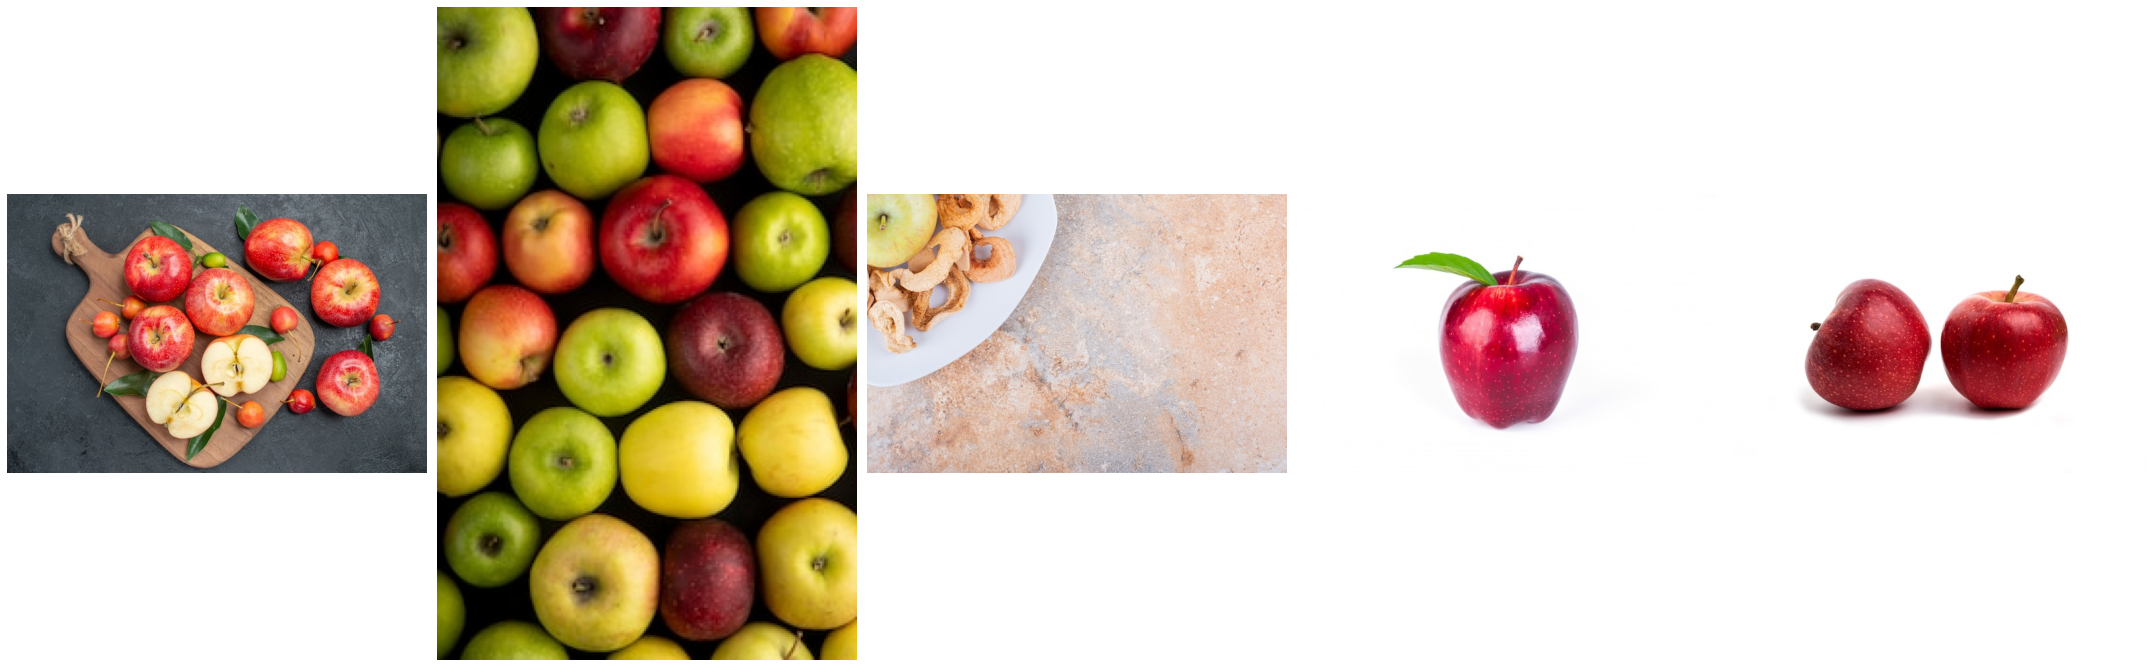

In [43]:
plot_images(sim(q,5))

In [44]:
anvil.server.connect("T2XVGFRI677IAEHJI667WWKV-XJXGAZGAZSNWSEBJ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [45]:
@anvil.server.callable
def get_res(text,count):
#     if text in vocab:
        return(sim(text,count))
#     else:
        

def get_images(url):
    return(plot_images(get_res()))